MLP (Multi Layer Perceptron) - 가장 기본적인 딥러닝모델의 구조

# Keras 개발 Process

1. 입력 텐서(X)와 출력 텐서(y)로 이뤄진 **훈련 데이터를 정의**

2. 입력과 출력을 연결하는 Layer(층)으로 이뤄진 **네트워크(모델) 구조를 정의**
    - Sequential 방식: 순서대로 쌓아올린 네트워크로 이뤄진 모델을 생성하는 방식
    - Functional API 방식: 다양한 구조의 네트워크로 이뤄진 모델을 생성하는 방식
    - Subclass 방식: 네트워크를 정의하는 클래스를 구현.
    

3. **모델 Compile(컴파일)** - 모델을 학습할 수 있는 상태로 만들어준다.
    - 모델이 Train(학습)할때 사용할 손실함수(Loss Function), 최적화기법(Optimizer), 학습과정을 모니터링할 평가지표(Metrics)를 설정
    
    > Compile: 실행할 수 있는 상태로 만들어 주는 것.

4. **Training(학습/훈련)**
    - Train dataset을 이용해 모델을 Train 시킨다.

# MNIST 이미지 분류 
- ### [MNIST](https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4)(Modified National Institute of Standards and Technology) database
- 흑백 손글씨 숫자 0-9까지 10개의 범주로 구분해놓은 데이터셋
- 하나의 이미지는 28 * 28 pixel 의 크기
- 6만개의 Train 이미지와 1만개의 Test 이미지로 구성됨.

##### import

In [1]:
import numpy as np
import tensorflow as tf   # 별칭: tf
from tensorflow import keras

In [2]:
# from tensorflow.keras.mnist import load_data

##### MNIST dataset Loading

In [3]:
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()

In [4]:
type(train_image), type(train_label)

(numpy.ndarray, numpy.ndarray)

In [5]:
print(train_image.shape, test_image.shape)

# 각 input data의 shape
# (데이터개수, 특성의 형태)
# (데이터개수, height, width)
# (60000, 28, 28)  # 28 X 28 사이즈의 흑백(grayscale) 이미지 60000 장

(60000, 28, 28) (10000, 28, 28)


In [6]:
print(train_label.shape, test_label.shape)

(60000,) (10000,)


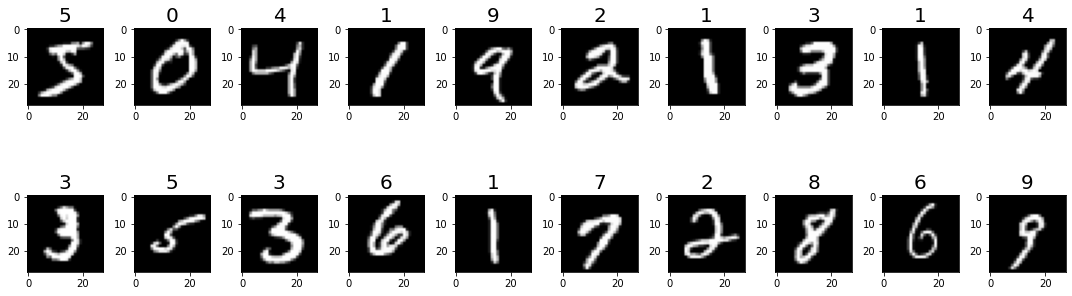

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
# 10장의 이미지와 label을 확인
N = 20
for i in range(N):
    plt.subplot(2, int(N/2), i+1)
    plt.imshow(train_image[i], cmap='gray')  #train_image의 i번째 이미지를 출력-grayscale의 경우 cmap을 gray로 지정.
    plt.title(str(train_label[i]), fontsize=20) # subplot(axes)의 제목을 label로 설정.
#     plt.axis('off')  #축을 그리지 안게 한다.
    
plt.tight_layout()
plt.show()    

# 배경: black (0), 숫자글씨: white (255)

In [8]:
train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## 네트워크(모델) 구현
- Network : 전체 모델 구조

In [9]:
# Sequential(순차) 방식으로 모델 생성.
model = keras.Sequential()

# 모델에 Layer들을 추가 - model.add( 레이어 객체 )
#  Layer - 모델이 추론하는 각각의 단계를 의미 
#     => Input(학습/추론 할 데이터를 넣어주는 단계), #, Output(추론결과를 출력)   Layer로 구성된다.
# 1. Input Layer 추가
model.add(keras.layers.InputLayer((28,28))) 

# 2. Hidden Layer들을 추가
model.add(keras.layers.Flatten())  

model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))

# 3. Output Layer 추가

model.add(keras.layers.Dense(10, activation='softmax'))

2022-07-18 16:48:07.121094: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-18 16:48:07.121189: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


In [10]:
# model = keras.Sequential()
# model.add(keras.layers.InputLayer((28,28)))

# model.add(keras.layers.Dense(256))
# model.add(keras.layers.Relu())

In [11]:
256+128+10

394

In [12]:
# 모델의 구조를 확인(Text로 리턴.)
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


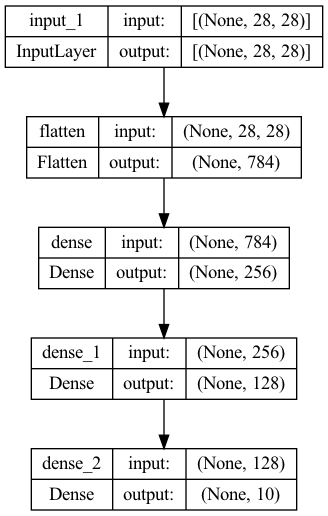

In [13]:
# 모델의 구조를 확인(graphviz 이용해 시각화)
#  pip instal|l pydot pydotplus  graphviz
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_shapes.png', show_shapes=True)

## 컴파일 단계
- 정의된 네트워크 모델에 학습을 위한 추가 설정을 한다.
    - Optimizer
    - 손실함수
    - 평가지표

In [14]:
model.compile(optimizer='adam', # 최적화 함수: Adam 알고리즘 
              loss='categorical_crossentropy', # cross entropy
              metrics=['accuracy'])  # 추가 평가지표 - 정확도

## 데이터 준비
- X (Input Data Image)
    - 0 ~ 1 사이의 값으로 정규화 시킨다. (0 ~ 255 -> 0 ~ 1: Feature Scaling)
- y (Output Data): 0 ~ 9
    - one hot encoding 처리
        - Label이 다중분류(Multi class classification)일 경우 One Hot Encoding 한다.
    - Keras의 onehot encoding 처리 함수
        - tensorflow.keras.utils.to_categorical()

In [15]:
print(np.min(train_image), np.max(train_image), train_image.dtype, sep=', ')
# uint8 : unsigned int - 8bit

0, 255, uint8


##### input image(X)를 정규화. 
- 이미지를 0 ~ 1 로 정규화 하고 타입을 float32로 변환

In [16]:
X_train = train_image.astype("float32")  # 타입변환: uint8 -> float32
X_train /= 255.0                          # X_train = X_train/255.0   # X_train이 가지는 제일 큰값(max)인 255로 나누면 0 ~ 1로 정규화.

X_test = test_image.astype(np.float32)
X_test /= 255.0

In [17]:
print(np.min(X_train), np.max(X_test), X_train.dtype, sep=', ')

0.0, 1.0, float32


##### label(y)를 one hot encoding
- 모델이 각 클래스별 확률이 출력되도록 정의 되었기 때문에 학습시(최적화시) 오차를 구하기 위해서는 정답이 Label이 아니라 확률이 되도록 y를 one hot encoding 처리한다.

In [18]:
print(train_label.shape, test_label.shape)
train_label[:5]

(60000,) (10000,)


array([5, 0, 4, 1, 9], dtype=uint8)

In [19]:
np.unique(train_label)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [20]:
y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

In [21]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [22]:
print(train_label.shape, test_label.shape)

(60000,) (10000,)


In [23]:
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


## 학습 (fit)
- model.fit()
    - 모델 학습 메소드. 
    - 학습과정의 Log를 History 객체로 반환한다.
- History : train 시 에폭별 평가지표값들을 모아서 제공.    

- epoch: 10
- batch_size: 100

- 문제집(train set) 에 문제가 60,000

- 1 epoch: 6만개 문제를 한번 다 풀어보는 것.
- 100문제(batch size) 풀고 정답확인하고 다음 100문제 풀고 정답 확인하고 ...
- batch_size 단위로 학습 => 1 step 이라고 이야기한다.

In [24]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [25]:
# train: 42,000
hist = model.fit(X_train, y_train, # input(X_train), output(y_train)
                  epochs=1,       # 전체 Train dataset을 몇번 반복해서 학습시킬지 정의. 1번 학습=> 1 epoch
                  batch_size=10000,  # Train dataset을 학습시키는 단위로 한번에 지정한 개수(100)의 데이터씩 끊어서 학습시킨다. 
                  validation_split=0.3  # train/validation 분리 - train set의 30%(0.3)를 validation set으로 사용. 
                 )

# Epoch 1/10   #현재학습중인 epoch/전체 epoch수
# 420/420 [==============================] - 4s 9ms/step          - loss: 0.0140 - accuracy: 0.9951 - val_loss: 0.1065 - val_accuracy: 0.9756
# 현재학습중인 step/전체step수     1epoch걸린시간 1step학습에 걸린시간  - train 오차(loss) - accurcay    - validation 오차(loss) - validation 정확도


2022-07-18 16:48:15.222763: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-18 16:48:15.393233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 2s 101ms/step - loss: 2.0900 - accuracy: 0.3352 - val_loss: 1.5668 - val_accuracy: 0.6820


2022-07-18 16:48:17.509959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


##### History 시각화

In [29]:
type(hist)

keras.callbacks.History

In [31]:
type(hist.history)
# {key:epoch별성능변화} 
hist.history

{'loss': [0.3039230704307556,
  0.1175987720489502,
  0.07621701806783676,
  0.0527120865881443,
  0.041856441646814346,
  0.028718171641230583,
  0.023106522858142853,
  0.016444006934762,
  0.015898313373327255,
  0.011567655019462109],
 'accuracy': [0.9128571152687073,
  0.9644047617912292,
  0.9764285683631897,
  0.983738124370575,
  0.9867619276046753,
  0.9911190271377563,
  0.9925952553749084,
  0.994857132434845,
  0.9944047331809998,
  0.9961666464805603],
 'val_loss': [0.17663951218128204,
  0.1269163340330124,
  0.09602602571249008,
  0.09848093241453171,
  0.1002732589840889,
  0.11442138999700546,
  0.09751618653535843,
  0.10709532350301743,
  0.11333401501178741,
  0.13527829945087433],
 'val_accuracy': [0.9491666555404663,
  0.9614444375038147,
  0.9710000157356262,
  0.9713888764381409,
  0.9715555310249329,
  0.9694444537162781,
  0.9725000262260437,
  0.9728333353996277,
  0.9728333353996277,
  0.968833327293396]}

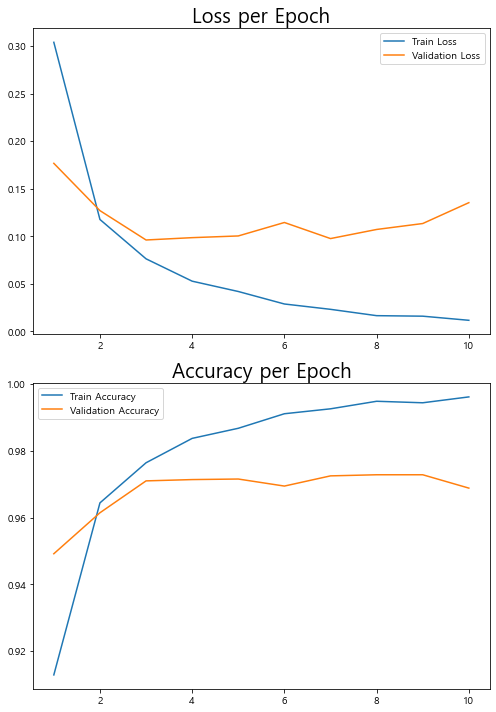

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,10))

plt.subplot(2,1,1)
plt.plot(range(1,11), hist.history['loss'], label='Train Loss')
plt.plot(range(1,11), hist.history['val_loss'], label="Validation Loss")
plt.title("Loss per Epoch", fontsize=20)
plt.legend()

plt.subplot(2,1,2)
plt.plot(range(1,11), hist.history['accuracy'], label='Train Accuracy')
plt.plot(range(1,11), hist.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy per Epoch", fontsize=20)

plt.legend()
plt.tight_layout()
plt.show()


# Loss: 오차 => 작을 수록 좋은 것.
# accuracy: 정확도 => 클 수록 좋은 것.

## 테스트셋 평가 -> 최종평가
model.evaluate(X, y)

In [33]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1170 - accuracy: 0.9720


In [34]:
print(test_loss, test_acc)

0.11701538413763046 0.972000002861023


## 새로운 데이터 추론
- 새로운 데이터를 추론하기 전에 학습데이터에 했던 전처리과정을 동일하게 적용 한 뒤 추론한다.

### 추론 메소드
- predict()
    - **분류:** 각 클래스 별 확률 반환
    - **회귀:** 최종 예측 결과
- 분류문제일때 predict() 결과에서 class label 출력하기 => 모델 출력값을 후처리해서 최종 예측 label을 확인한다.
    - 이진 분류(binary classification)
        - `numpy.where(model.predict(x) > 0.5, 1, 0).astype("int32")`
    - 다중클래스 분류(multi-class classification)
        - `numpy.argmax(model.predict(x), axis=1)`

In [35]:
# X_test의 처음 5개 데이터를 이용해서 추론
# X_test는 test_image를 전처리한 데이터셋(uint8->float32 변환, 0 ~ 1 사이로 정규화.)
new_image = X_test[:5]
new_image.shape

(5, 28, 28)

In [36]:
# predict(예측할 데이터의 Feature)  -> (데이터개수, Feature shape)
result = model.predict(new_image)
result.shape

1/1 [==============================] - 0s 138ms/step


(5, 10)

In [40]:
print(result[0])  # 0번 데이터에대한 예측결과 (10, ) : 0 ~ 9일 각각의 확률
# 가장 높은 확률
np.max(result[0])

[5.5906870e-09 8.0296644e-11 1.4141702e-07 4.0561093e-07 1.0347184e-15
 1.1521008e-12 2.7935464e-16 9.9999928e-01 1.4837118e-09 2.6412619e-07]


0.9999993

In [43]:
# label을 확인 (가장 높은 확률이 있는 index)
result_label = np.argmax(result, axis=-1)  #axis=-1 : 마지막 축을 기준으로 max값가진 index를 조회 (5, 10) 마지막 축은 1번축

In [44]:
result_label

array([7, 2, 1, 0, 4], dtype=int64)

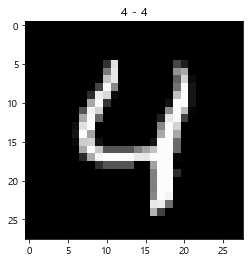

In [51]:
idx = 4

plt.imshow(test_image[idx], cmap='gray')
plt.title(f'{test_label[idx]} - {result_label[idx]}')

plt.show()